## Test notebook pour Runa

Nous commençons par 

In [23]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install pyyaml==5.1

Note: you may need to restart the kernel to use updated packages.


In [25]:
!pip install git+https://github.com/facebookresearch/detectron2.git

  Cloning https://github.com/facebookresearch/detectron2.git to C:\Users\grani\AppData\Local\Temp\pip-req-build-348_rgt8
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git 'C:\Users\grani\AppData\Local\Temp\pip-req-build-348_rgt8'
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "c:\Users\grani\anaconda3\envs\torch_cuda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "c:\Users\grani\anaconda3\envs\torch_cuda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\grani\anaconda3\envs\torch_cuda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
          return hook(conf

In [26]:
import sys, os, distutils.core

!git clone https://github.com/facebookresearch/detectron2
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

fatal: destination path 'detectron2' already exists and is not an empty directory.
Le fichier sp�cifi� est introuvable.


In [27]:
import detectron2
print("Detectron2 OK")


Detectron2 OK


In [28]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2025 NVIDIA Corporation
Built on Wed_Aug_20_13:58:20_Pacific_Daylight_Time_2025
Cuda compilation tools, release 13.0, V13.0.88
Build cuda_13.0.r13.0/compiler.36424714_0
torch:  2.5 ; cuda:  2.5.1


In [29]:
!pip install tabulate termcolor yacs tqdm matplotlib opencv-python


In [30]:
!pip install iopath fvcore


In [31]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import cv2

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import matplotlib.pyplot as plt

In [32]:
import requests

url = "http://images.cocodataset.org/val2017/000000439715.jpg"
response = requests.get(url)

with open("input.jpg", "wb") as f:
    f.write(response.content)


Starting new HTTP connection (1): images.cocodataset.org:80
http://images.cocodataset.org:80 "GET /val2017/000000439715.jpg HTTP/1.1" 200 209222


Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stre

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


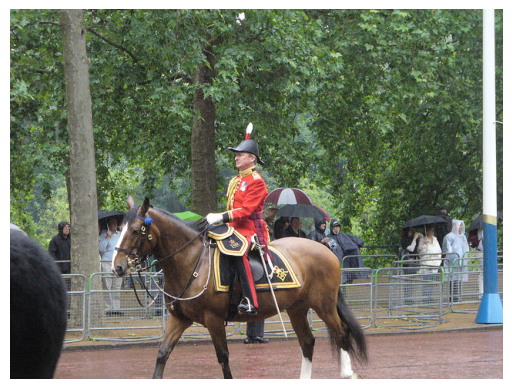

In [33]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [34]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[02/12 22:33:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
URL https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl cached in C:\Users\grani/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl
[Checkpointer] Loading from C:\Users\grani/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'


c:\Users\grani\runa\detectron2\detectron2\checkpoint\detection_checkpoint.py:73: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  data = pickle.load(f, encoding="latin1")


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=9.6.
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotli

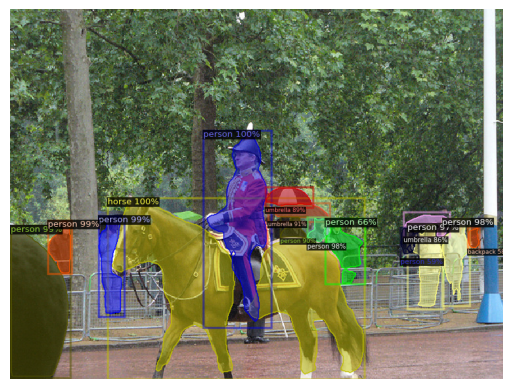

In [35]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


plt.imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [36]:
import os

os.listdir("VOC/VOCtest_train_06-Nov-2007/VOCdevkit/VOC2007/ImageSets/Main")


['aeroplane_test.txt',
 'aeroplane_train.txt',
 'aeroplane_trainval.txt',
 'aeroplane_val.txt',
 'bicycle_test.txt',
 'bicycle_train.txt',
 'bicycle_trainval.txt',
 'bicycle_val.txt',
 'bird_test.txt',
 'bird_train.txt',
 'bird_trainval.txt',
 'bird_val.txt',
 'boat_test.txt',
 'boat_train.txt',
 'boat_trainval.txt',
 'boat_val.txt',
 'bottle_test.txt',
 'bottle_train.txt',
 'bottle_trainval.txt',
 'bottle_val.txt',
 'bus_test.txt',
 'bus_train.txt',
 'bus_trainval.txt',
 'bus_val.txt',
 'car_test.txt',
 'car_train.txt',
 'car_trainval.txt',
 'car_val.txt',
 'cat_test.txt',
 'cat_train.txt',
 'cat_trainval.txt',
 'cat_val.txt',
 'chair_test.txt',
 'chair_train.txt',
 'chair_trainval.txt',
 'chair_val.txt',
 'cow_test.txt',
 'cow_train.txt',
 'cow_trainval.txt',
 'cow_val.txt',
 'diningtable_test.txt',
 'diningtable_train.txt',
 'diningtable_trainval.txt',
 'diningtable_val.txt',
 'dog_test.txt',
 'dog_train.txt',
 'dog_trainval.txt',
 'dog_val.txt',
 'horse_test.txt',
 'horse_train.txt

In [37]:
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(
    model_zoo.get_config_file(
        "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
    )
)

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

predictor = DefaultPredictor(cfg)


[02/12 22:33:33 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...
[Checkpointer] Loading from C:\Users\grani/.torch/iopath_cache\detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458\model_final_280758.pkl ...
Reading a file from 'Detectron2 Model Zoo'


c:\Users\grani\runa\detectron2\detectron2\checkpoint\detection_checkpoint.py:73: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  data = pickle.load(f, encoding="latin1")


In [38]:
import cv2
import random
import os

img_dir = "VOC/VOCtest_train_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages"
img_path = os.path.join(img_dir, random.choice(os.listdir(img_dir)))

im = cv2.imread(img_path)


In [39]:
outputs = predictor(im)
print(outputs)

{'instances': Instances(num_instances=2, image_height=375, image_width=500, fields=[pred_boxes: Boxes(tensor([[ 98.2733, 148.4326, 279.3505, 205.8886],
        [170.5707, 147.3370, 185.9516, 167.7859]], device='cuda:0')), scores: tensor([0.9858, 0.7357], device='cuda:0'), pred_classes: tensor([2, 0], device='cuda:0')])}


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=6.701539831928168.
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packa

(np.float64(-0.5), np.float64(499.5), np.float64(374.5), np.float64(-0.5))

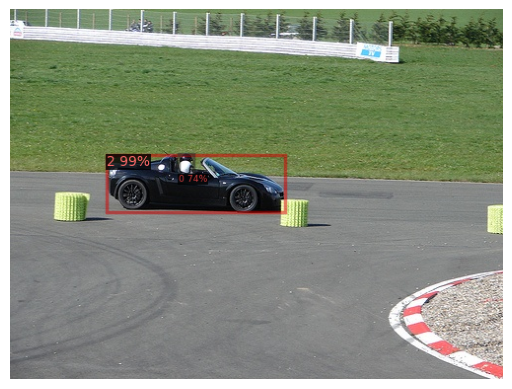

In [40]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

v = Visualizer(im[:, :, ::-1], scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

import matplotlib.pyplot as plt
plt.imshow(out.get_image())
plt.axis("off")


In [41]:
import cv2

def detect_crop_and_blurv2(image, predictor, blur_ksize=51):
    """
    image : numpy array BGR (cv2.imread)
    predictor : Detectron2 DefaultPredictor
    blur_ksize : taille du kernel de flou (impair)

    retourne :
        results : liste de dict :
            {
                "box": [x1, y1, x2, y2],
                "crop": image cropée,
                "blurred": image globale avec bbox floutée
            }
    """

    outputs = predictor(image)
    instances = outputs["instances"].to("cpu")

    if len(instances) == 0:
        return []

    boxes = instances.pred_boxes.tensor.numpy().astype(int)

    results = []

    for box in boxes:
        x1, y1, x2, y2 = box

        # ---- Crop régional (I(r)) ----
        crop = image[y1:y2, x1:x2].copy()

        # ---- Image globale avec bbox floutée (I(g)) ----
        blurred_img = image.copy()

        roi = blurred_img[y1:y2, x1:x2]
        roi_blur = cv2.GaussianBlur(roi, (blur_ksize, blur_ksize), 0)

        blurred_img[y1:y2, x1:x2] = roi_blur

        results.append({
            "box": [x1, y1, x2, y2],
            "crop": crop,
            "blurred": blurred_img
        })

    return results


In [42]:
import matplotlib.pyplot as plt

def show_crop_and_blurv2(results, max_images=5):

    if len(results) == 0:
        print("Aucun objet détecté.")
        return

    print(f"{len(results)} objets détectés")

    n = min(len(results), max_images)

    for i in range(n):
        crop = results[i]["crop"]
        blurred = results[i]["blurred"]
        box = results[i]["box"]

        fig, axes = plt.subplots(1, 2, figsize=(9,4))

        axes[0].set_title(f"Crop {i}\nbox={box}")
        axes[0].imshow(crop[:, :, ::-1])
        axes[0].axis("off")

        axes[1].set_title(f"Blurred global {i}")
        axes[1].imshow(blurred[:, :, ::-1])
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()


2 objets détectés
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='c:\\Users\\grani\\anaconda3\\envs\\torch_cuda\\Lib\\site-

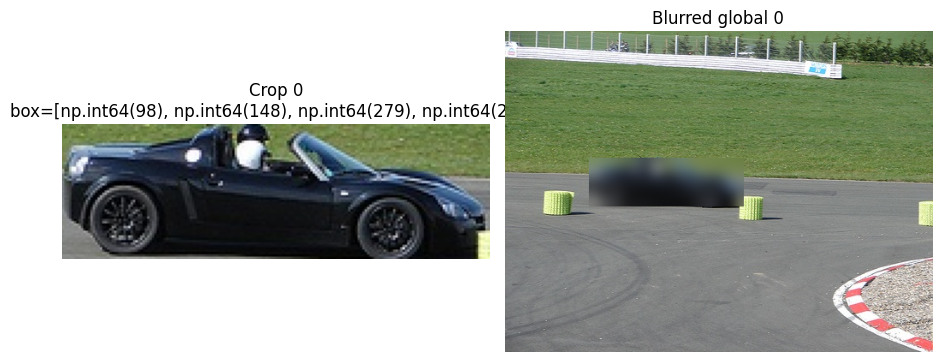

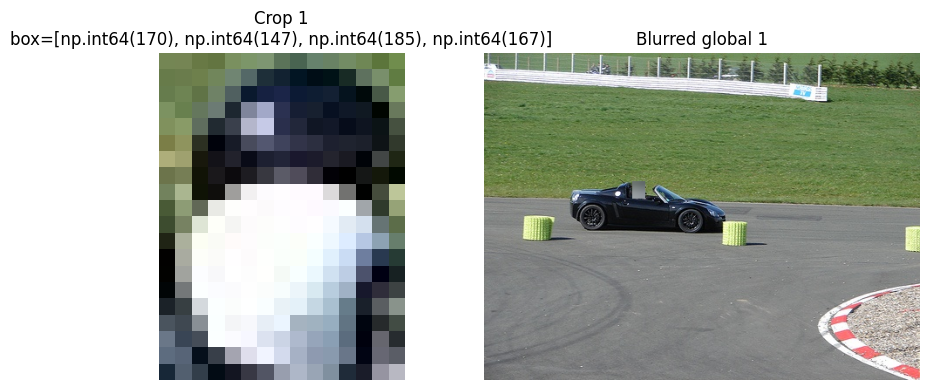

In [43]:
results = detect_crop_and_blurv2(im, predictor)
show_crop_and_blurv2(results, max_images=3)


In [44]:
!pip install open_clip_torch


In [45]:
import open_clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model, preprocess, tokenizer = open_clip.create_model_and_transforms(
    "ViT-B-16",
    pretrained="openai"
)

model = model.to(device)
model.eval()


Parsing model identifier. Schema: None, Identifier: ViT-B-16
Loaded built-in ViT-B-16 model config.
close.started
close.complete
connect_tcp.started host='huggingface.co' port=443 local_address=None timeout=10 socket_options=None
connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x000001B83C8BAA80>
start_tls.started ssl_context=<ssl.SSLContext object at 0x000001B7A00AB150> server_hostname='huggingface.co' timeout=10
start_tls.complete return_value=<httpcore._backends.sync.SyncStream object at 0x000001B79D3C6930>
send_request_headers.started request=<Request [b'HEAD']>
send_request_headers.complete
send_request_body.started request=<Request [b'HEAD']>
send_request_body.complete
receive_response_headers.started request=<Request [b'HEAD']>
receive_response_headers.complete return_value=(b'HTTP/1.1', 302, b'Found', [(b'Content-Type', b'text/plain; charset=utf-8'), (b'Content-Length', b'1343'), (b'Connection', b'keep-alive'), (b'Date', b'Thu, 12 Feb 2026 21:33:

c:\Users\grani\anaconda3\envs\torch_cuda\Lib\site-packages\open_clip\factory.py:450: UserWarning: QuickGELU mismatch between final model config (quick_gelu=False) and pretrained tag 'openai' (quick_gelu=True).
  warnings.warn(


Loading full pretrained weights from: C:\Users\grani\.cache\huggingface\hub\models--timm--vit_base_patch16_clip_224.openai\snapshots\977e3dd0ec55ab8da155f2fbeb6b5f54948b6e3d\open_clip_model.safetensors
Final image preprocessing configuration set: {'size': (224, 224), 'mode': 'RGB', 'mean': (0.48145466, 0.4578275, 0.40821073), 'std': (0.26862954, 0.26130258, 0.27577711), 'interpolation': 'bicubic', 'resize_mode': 'shortest', 'fill_color': 0}
Model ViT-B-16 creation process complete.


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine

In [46]:
from PIL import Image
import numpy as np

def encode_image_clip(image_bgr):
    """
    image_bgr : image OpenCV
    retourne : embedding torch (1, D)
    """

    # BGR → RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # numpy → PIL
    pil_img = Image.fromarray(image_rgb)

    # preprocessing CLIP
    image_input = preprocess(pil_img).unsqueeze(0).to(device)

    with torch.no_grad():
        embedding = model.encode_image(image_input)

    return embedding


In [47]:
def encode_runa_batch(results):

    crop_embeddings = []
    global_embeddings = []

    for r in results:
        emb_crop = encode_image_clip(r["crop"])
        emb_global = encode_image_clip(r["blurred"])

        crop_embeddings.append(emb_crop)
        global_embeddings.append(emb_global)

    return crop_embeddings, global_embeddings


In [48]:
crop_emb, global_emb = encode_runa_batch(results)

print("embedding crop shape:", crop_emb[0].shape)
print("embedding global shape:", global_emb[0].shape)


embedding crop shape: torch.Size([1, 512])
embedding global shape: torch.Size([1, 512])


In [49]:
def normalize_embedding(emb):
    return emb / emb.norm(dim=-1, keepdim=True)


In [50]:
def fuse_embeddings(crop_emb, global_emb, lam=0.5):
    fused = lam * crop_emb + (1 - lam) * global_emb
    fused = fused / fused.norm(dim=-1, keepdim=True)
    return fused


In [51]:
fused_emb = fuse_embeddings(crop_emb[0], global_emb[0])
print(fused_emb.shape)


torch.Size([1, 512])


In [74]:
import open_clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# récupérer le tokenizer correct
tokenizer = open_clip.get_tokenizer("ViT-B-16")

voc_labels1 = [
    "a photo of a aeroplane","a photo of a bicycle","a photo of a bird",
    "a photo of a boat","a photo of a bottle","a photo of a bus",
    "a photo of a car","a photo of a cat","a photo of a chair",
    "a photo of a cow","a photo of a dining table","a photo of a dog",
    "a photo of a horse","a photo of a motorbike","a photo of a person",
    "a photo of a potted plant","a photo of a sheep","a photo of a sofa",
    "a photo of a train","a photo of a tv monitor"
]

text_tokens = tokenizer(voc_labels1)
text_tokens = text_tokens.to(device)

with torch.no_grad():
    text_embeddings = model.encode_text(text_tokens)

text_embeddings = text_embeddings / text_embeddings.norm(dim=-1, keepdim=True)

print(text_embeddings.shape)




Parsing tokenizer identifier. Schema: None, Identifier: ViT-B-16
Attempting to load config from built-in: ViT-B-16
Using default SimpleTokenizer.
torch.Size([20, 512])


In [53]:
def runa_score(fused_emb, text_embeddings):
    similarities = fused_emb @ text_embeddings.T   # cosine similarity car embeddings normalisés
    max_sim = similarities.max().item()
    score = -max_sim
    return score, similarities


In [54]:
fused_emb = fuse_embeddings(crop_emb[0], global_emb[0])
score, sims = runa_score(fused_emb, text_embeddings)

print("RUNA score:", score)
print("Similarities shape:", sims.shape)


RUNA score: -0.3070667088031769
Similarities shape: torch.Size([1, 20])


In [55]:
scores = []

for i in range(len(crop_emb)):
    fused = fuse_embeddings(crop_emb[i], global_emb[i])
    score, _ = runa_score(fused, text_embeddings)
    scores.append(score)

print("Scores par bbox :", scores)


Scores par bbox : [-0.3070667088031769, -0.26613667607307434]


In [56]:
image_score = min(scores) if len(scores) > 0 else 0
print("Image RUNA score:", image_score)


Image RUNA score: -0.3070667088031769


In [57]:
def runa_score_image(image, predictor, text_embeddings):

    # 1. Detectron2 + crop + blur
    results = detect_crop_and_blurv2(image, predictor)

    if len(results) == 0:
        return None   # aucune bbox détectée

    # 2. CLIP embeddings
    crop_emb, global_emb = encode_runa_batch(results)

    # 3. Score RUNA pour chaque bbox
    scores = []
    for i in range(len(crop_emb)):
        fused = fuse_embeddings(crop_emb[i], global_emb[i])
        score, _ = runa_score(fused, text_embeddings)
        scores.append(score)

    # 4. Score image = meilleur objet
    return min(scores)


In [58]:
import os

voc_root = "VOC/VOCtest_train_06-Nov-2007/VOCdevkit/VOC2007"
img_dir = os.path.join(voc_root, "JPEGImages")
split_file = os.path.join(voc_root, "ImageSets", "Main", "test.txt")

with open(split_file, "r") as f:
    test_ids = [line.strip() for line in f]

img_paths = [os.path.join(img_dir, f"{img_id}.jpg") for img_id in test_ids]
print("Nb images test:", len(img_paths))
print("Exemple:", img_paths[0])


Nb images test: 4952
Exemple: VOC/VOCtest_train_06-Nov-2007/VOCdevkit/VOC2007\JPEGImages\000001.jpg


In [60]:
import cv2
import pickle
from tqdm import tqdm

scores_voc = []
processed = 0

save_every = 50  # sauvegarde tous les 50 résultats
save_path = "scores_voc2007_test.pkl"

for img_path in tqdm(img_paths):
    image = cv2.imread(img_path)
    if image is None:
        continue

    score = runa_score_image(image, predictor, text_embeddings)

    if score is not None:
        scores_voc.append(score)
        processed += 1

        # sauvegarde progressive
        if processed % save_every == 0:
            with open(save_path, "wb") as f:
                pickle.dump(scores_voc, f)

# sauvegarde finale
with open(save_path, "wb") as f:
    pickle.dump(scores_voc, f)

print("Nombre d'images scorées:", len(scores_voc))
print("Min/Max scores:", min(scores_voc), max(scores_voc))


100%|██████████| 4952/4952 [08:25<00:00,  9.79it/s]

Nombre d'images scorées: 4915
Min/Max scores: -0.35854533314704895 -0.2322852909564972


In [ ]:
import pickle

with open("scores_voc2007_test.pkl", "rb") as f:
    scores_voc = pickle.load(f)

print(type(scores_voc))
print(len(scores_voc))


<class 'list'>
4915


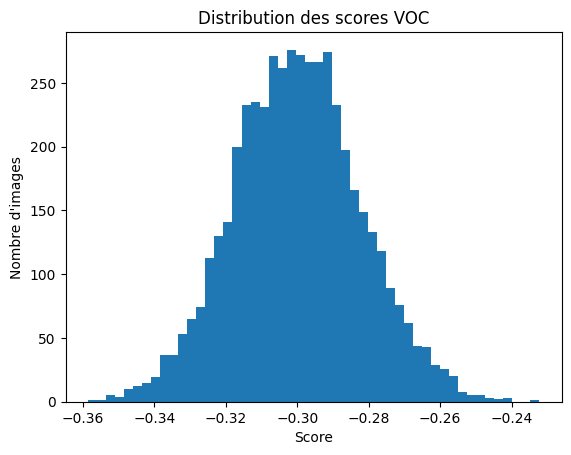

In [62]:
import matplotlib.pyplot as plt

plt.hist(scores_voc, bins=50)
plt.title("Distribution des scores VOC")
plt.xlabel("Score")
plt.ylabel("Nombre d'images")
plt.show()


In [63]:
coco_dir = "coco/images/val2014"


In [ ]:
import os
import cv2
import pickle
from tqdm import tqdm

img_paths = [
    os.path.join(coco_dir, f)
    for f in os.listdir(coco_dir)
    if f.endswith(".jpg")
]

print("Nb images COCO:", len(img_paths))
print("Exemple:", img_paths[0])

# # optionnel : limiter pour test
# img_paths = img_paths[:500]

scores_coco = []
processed = 0

save_every = 50
save_path = "scores_coco2014_val.pkl"

for img_path in tqdm(img_paths):
    image = cv2.imread(img_path)
    if image is None:
        continue

    score = runa_score_image(image, predictor, text_embeddings)

    if score is not None:
        scores_coco.append(score)
        processed += 1

        # sauvegarde progressive
        if processed % save_every == 0:
            with open(save_path, "wb") as f:
                pickle.dump(scores_coco, f)

# sauvegarde finale
with open(save_path, "wb") as f:
    pickle.dump(scores_coco, f)

print("Nombre d'images scorées:", len(scores_coco))
print("Min/Max scores:", min(scores_coco), max(scores_coco))


Nb images COCO: 40504
Exemple: coco/images/val2014\COCO_val2014_000000000042.jpg


  0%|          | 0/500 [00:00<?, ?it/s]c:\Users\grani\anaconda3\envs\torch_cuda\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 500/500 [01:12<00:00,  6.93it/s]

Nombre d'images scorées: 499
Min/Max scores: -0.34793615341186523 -0.22152061760425568


In [64]:
import pickle

with open("scores_coco2014_val.pkl", "rb") as f:
    scores_coco = pickle.load(f)

print(len(scores_coco))
print(scores_coco[:10])


499
[-0.26057153940200806, -0.30887454748153687, -0.29749730229377747, -0.2875436246395111, -0.27166545391082764, -0.29990142583847046, -0.309712290763855, -0.28267571330070496, -0.27558353543281555, -0.30827340483665466]


In [65]:
import numpy as np

print("ID mean:", np.mean(scores_voc))
print("OOD mean:", np.mean(scores_coco))


ID mean: -0.2999354366216873
OOD mean: -0.2823312354529788


In [66]:
from sklearn.metrics import roc_auc_score

y_true = [0]*len(scores_voc) + [1]*len(scores_coco)
y_scores = scores_voc + scores_coco

auc = roc_auc_score(y_true, y_scores)
print("AUROC:", auc)


AUROC: 0.749476980410465


In [67]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

idx = np.argmin(np.abs(tpr - 0.95))
fpr95 = fpr[idx]

print("FPR95:", fpr95)


FPR95: 0.8402848423194303


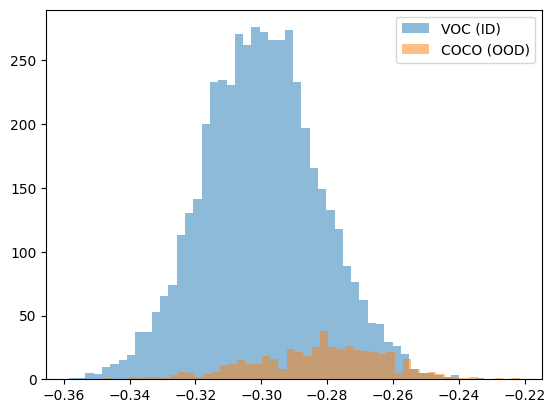

In [68]:
import matplotlib.pyplot as plt

plt.hist(scores_voc, bins=50, alpha=0.5, label="VOC (ID)")
plt.hist(scores_coco, bins=50, alpha=0.5, label="COCO (OOD)")
plt.legend()
plt.show()


In [70]:
import os

print(os.path.exists("coco/annotations/instances_val2014.json"))


True


In [71]:
!pip install pycocotools


In [72]:
from pycocotools.coco import COCO

ann_file = "coco/annotations/instances_val2014.json"
coco = COCO(ann_file)


loading annotations into memory...
Done (t=2.01s)
creating index...
index created!


In [84]:
cats = coco.loadCats(coco.getCatIds())
cat_names = [c["name"] for c in cats]
print(cat_names)


['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [87]:
voc_labels_coco = {
"airplane","bicycle","bird","boat","bottle","bus","car","cat",
"chair","cow","dining table","dog","horse","motorcycle",
"person","potted plant","sheep","couch","train","tv"
}

cats = coco.loadCats(coco.getCatIds())
cat_ids = [c["id"] for c in cats if c["name"] in voc_labels_coco]

print("Cat IDs:", cat_ids)


Cat IDs: [1, 2, 3, 4, 5, 6, 7, 9, 16, 17, 18, 19, 20, 21, 44, 62, 63, 64, 67, 72]


In [90]:
img_ids_with_voc = set()

for cat_id in cat_ids:
    ann_ids = coco.getAnnIds(catIds=[cat_id])
    anns = coco.loadAnns(ann_ids)
    for ann in anns:
        img_ids_with_voc.add(ann["image_id"])

print("Images contenant classes VOC:", len(img_ids_with_voc))



Images contenant classes VOC: 32467


In [91]:
all_img_ids = set(coco.getImgIds())
ood_img_ids = list(all_img_ids - img_ids_with_voc)

print("Images OOD:", len(ood_img_ids))


Images OOD: 8037


In [92]:
img_paths_ood = [
    os.path.join(coco_dir, coco.loadImgs(img_id)[0]["file_name"])
    for img_id in ood_img_ids
]

print("Exemple:", img_paths_ood[0])


Exemple: coco/images/val2014\COCO_val2014_000000557059.jpg


In [93]:
import cv2
import pickle
from tqdm import tqdm

scores_coco_filtered = []
processed = 0

save_every = 100
save_path = "scores_coco_filtered.pkl"

for img_path in tqdm(img_paths_ood):
    image = cv2.imread(img_path)
    if image is None:
        continue

    score = runa_score_image(image, predictor, text_embeddings)

    if score is not None:
        scores_coco_filtered.append(score)
        processed += 1

        # sauvegarde progressive
        if processed % save_every == 0:
            with open(save_path, "wb") as f:
                pickle.dump(scores_coco_filtered, f)

# sauvegarde finale
with open(save_path, "wb") as f:
    pickle.dump(scores_coco_filtered, f)

print("Nombre d'images scorées:", len(scores_coco_filtered))


100%|██████████| 8037/8037 [12:06<00:00, 11.06it/s]

Nombre d'images scorées: 7744


In [94]:
import numpy as np

print("ID mean:", np.mean(scores_voc))
print("OOD mean:", np.mean(scores_coco_filtered))


ID mean: -0.2999354366216873
OOD mean: -0.2689757651903413


In [95]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = [0]*len(scores_voc) + [1]*len(scores_coco_filtered)
y_scores = scores_voc + scores_coco_filtered

auc = roc_auc_score(y_true, y_scores)

fpr, tpr, _ = roc_curve(y_true, y_scores)
fpr95 = fpr[np.argmin(np.abs(tpr - 0.95))]

print("AUROC:", auc)
print("FPR95:", fpr95)


AUROC: 0.8988460859403242
FPR95: 0.407527975584944


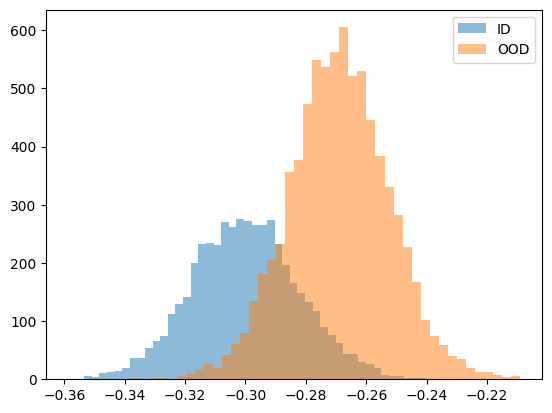

In [97]:
plt.hist(scores_voc, bins=50, alpha=0.5, label="ID")
plt.hist(scores_coco_filtered, bins=50, alpha=0.5, label="OOD")
plt.legend()
plt.show()
